# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 30 балла


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.



*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. Формулами мат. ожидания и дисперсии с занятия пользоваться нельзя, но стоит сверить ответ.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

Решение:
1. Рассмотрим в одномерном случае, как и указано в условии: $$\widehat{\theta} = (x^T x) ^ {-1} \cdot x^T \cdot Y = \frac{(x, Y)}{|x|^2} = \frac{\sum_{i=1}^{n} x_i \cdot Y_i}{\sum_{i=1}^{n} x_i^2} = \frac{\sum_{i=1}^{n} x_i \cdot (\theta x_i + \varepsilon_i)}{\sum_{i=1}^{n} x_i^2} =
\frac{\sum_{i=1}^{n} \theta x_i^2 + x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2} =
\theta + \frac{\sum_{i=1}^{n} x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2}.$$
2. Пусть $L$ есть квадратичная ошибка, $\eta$ это скорость обучения. Тогда градиентный спуск можно выразить как $$- \eta \nabla L= - \eta \nabla \sum_{i=1}^{n}(\widehat{y_i} - Y_i)^2 = - \eta \nabla \sum_{i=1}^{n}(\widehat{\theta} x_i - Y_i)^2 = - \eta \sum_{i=1}^{n} 2 (\widehat{\theta} x_i - Y_i) x_i.$$
Рассмотрим стохастический градиентный спуск:
$$ -\eta \nabla L_{st} = -\eta \nabla (\widehat{y_k} - y_k)^2 = -2 \eta(\widehat{\theta} x_k - y_k) x_k,$$
где $k$ это случайный индекс из множества возможных индексов.
3. Воспользуемся первым пунктом:
$$\mathbb{E}\widehat{\theta} = \mathbb{E} \biggl(
\frac{(x, Y)}{|x|^2} \biggl) = \frac{\mathbb{E}(x, Y)}{|x|^2} =
 \mathbb{E} \frac{\sum_{i=1}^{n}(x_i, \theta x_i + \varepsilon_i)}{|x|^2} = \theta + \mathbb{E}\frac{\sum_{i=1}^{n}(x_i, \varepsilon_i)}{|x|^2} = \theta.$$
Далее расчитаем второе матожидание:
$$\mathbb{E}\widehat{y} = \mathbb{E}\widehat{\theta} x = (\mathbb{E}\widehat{\theta})x =
\theta x = y$$
4. $\mathbb{D}\widehat{\theta} = \mathbb{D} \biggl(\theta + \frac{\sum_{i=1}^{n}(x_i, \varepsilon_i)}{|x|^2}\biggl) = \frac{1}{|x^4|} \mathbb{D} \biggl(\sum_{i=1}^{n}(x_i, \varepsilon_i)\biggl) + 2 \cdot \text{сумма по всем наборам} {n \choose 2} \cdot cov(x_i \varepsilon_i, x_j \varepsilon_j)  = \frac{1}{|x^4|} \mathbb{D} \biggl(\sum_{i=1}^{n}(x_i, \varepsilon_i)\biggl) = \frac{\sigma^2}{|x|^2}$  

При решении мы воспользовались тем, что ковариация равна нулю в данном случае.

$$\mathbb{D}{\widehat{y}(x)} = \mathbb{D} (\widehat{\theta} x) = |x|^2  \mathbb{D} (\widehat{\theta}) = |x|^2  \frac{\sigma^2}{|x|^2} = \sigma^2$$

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [11]:
data = pd.read_csv('day.csv')
train, test = train_test_split(data, test_size=0.2)
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. 

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [5]:
categorial_features = ['season', 'workingday', 'weekday', 'holiday', 'mnth', ]  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

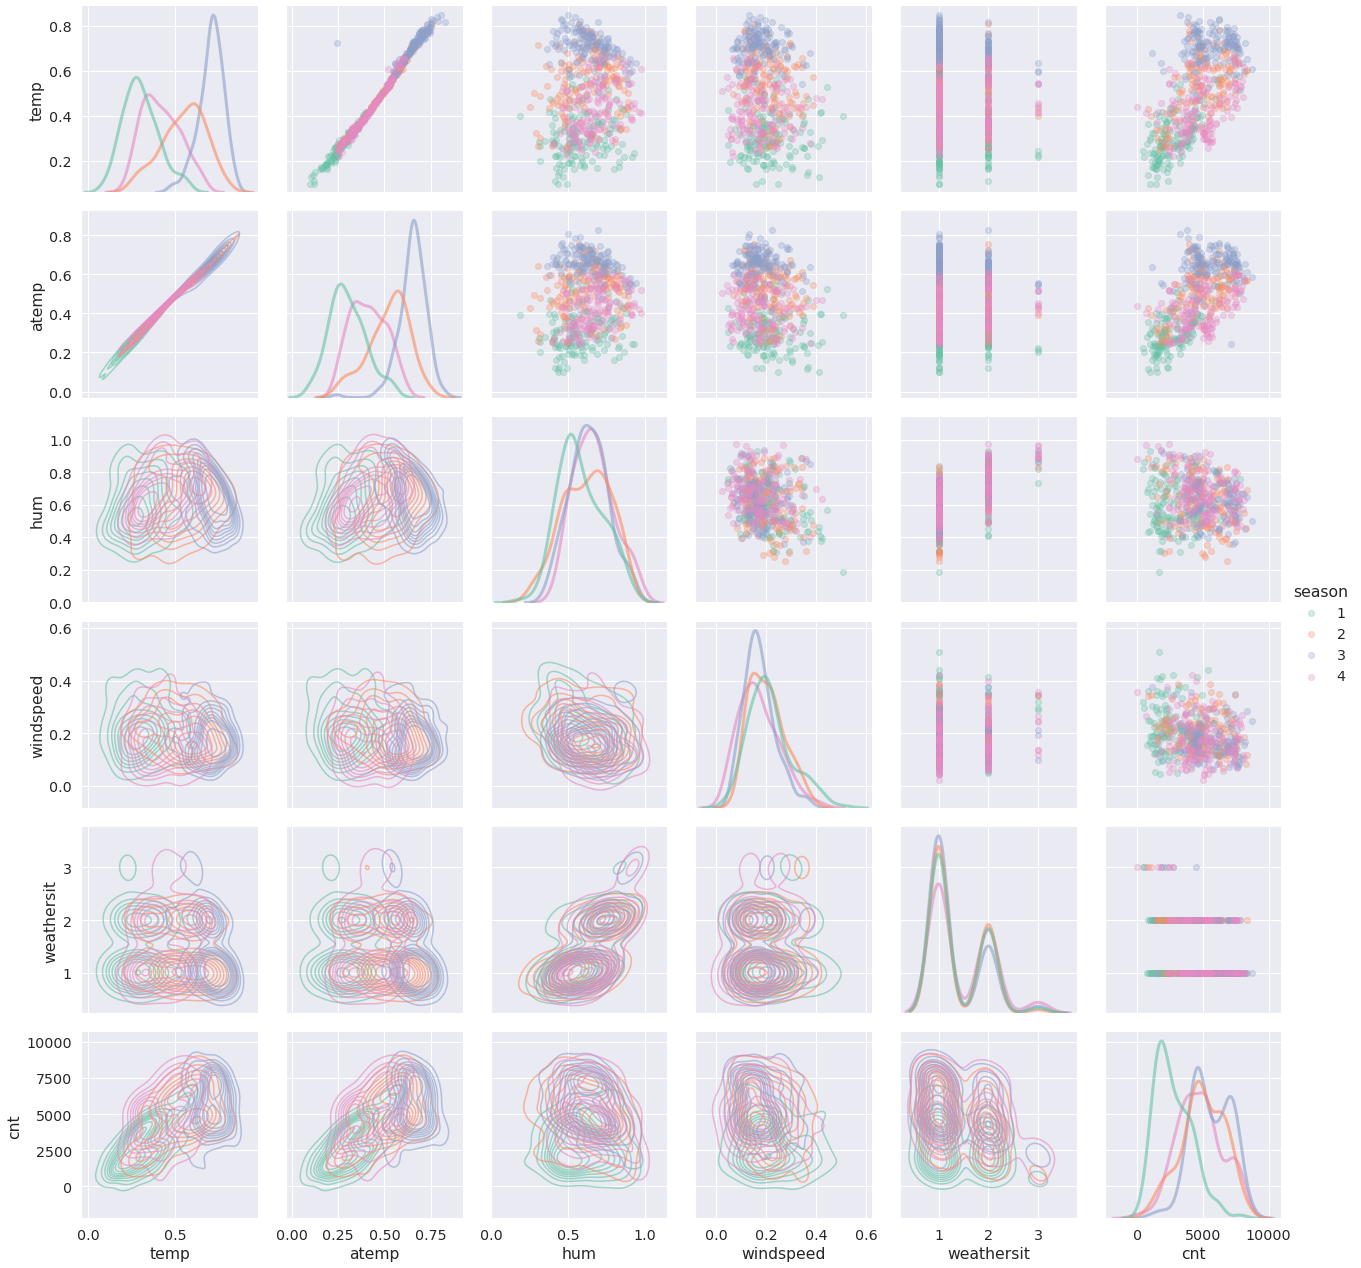

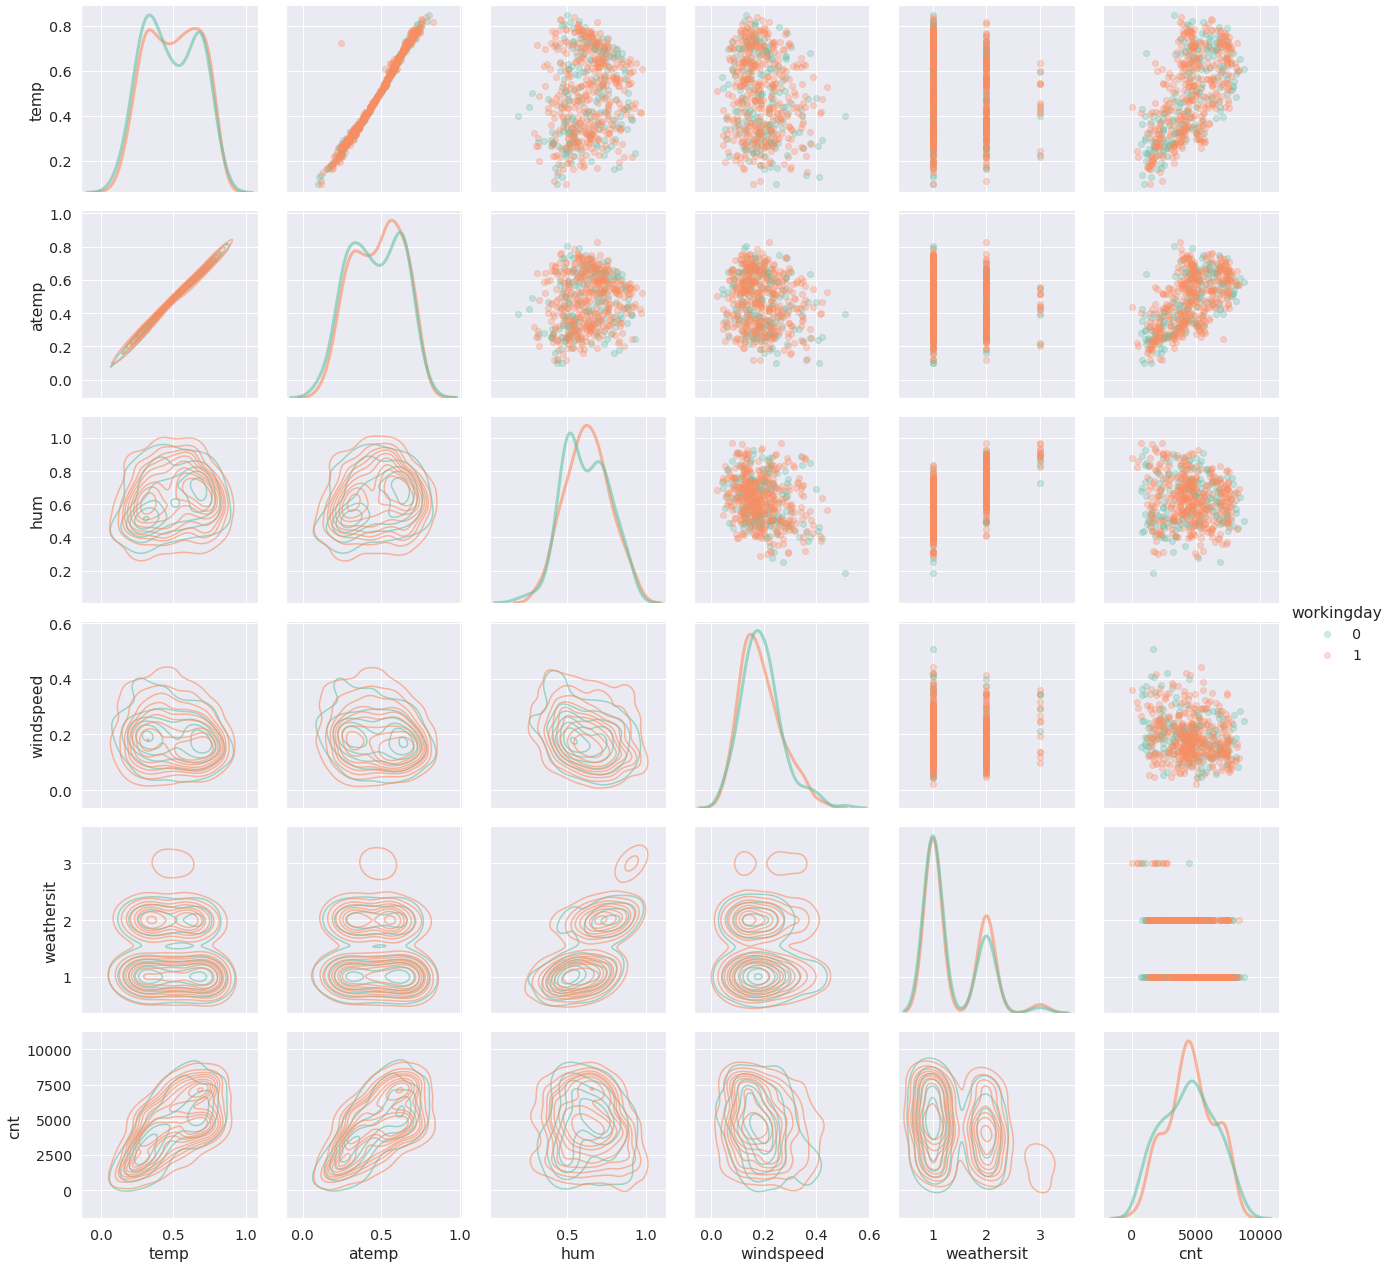

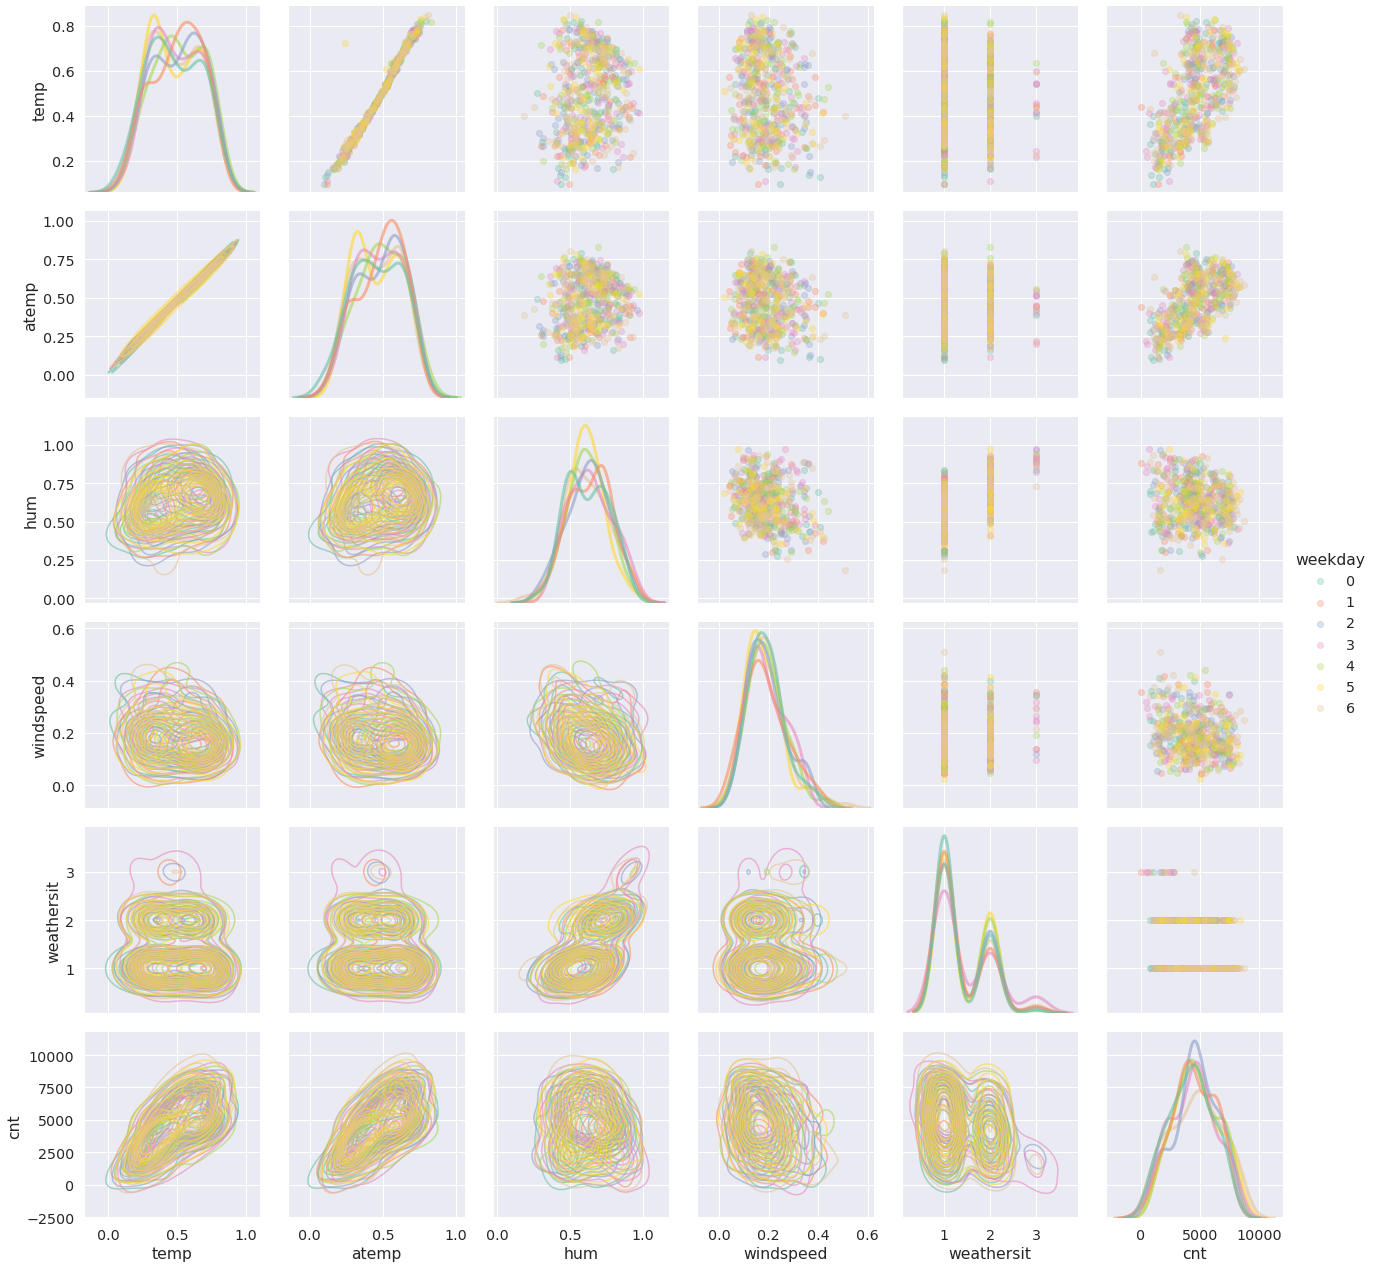

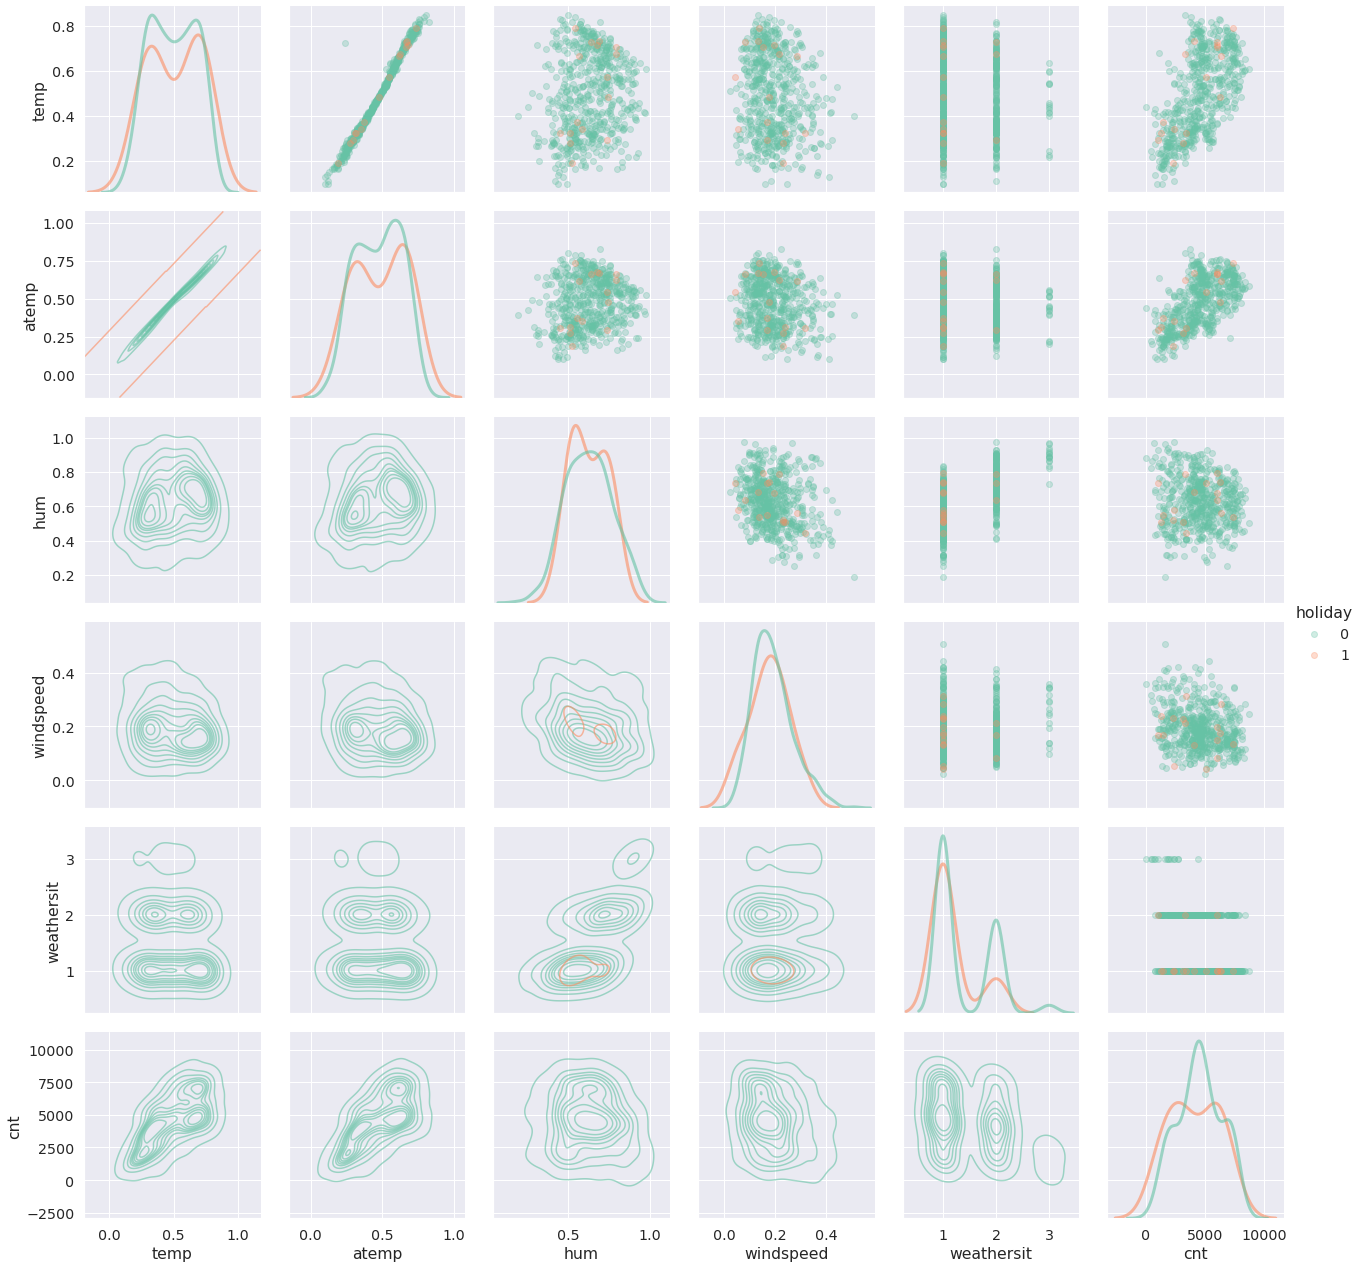

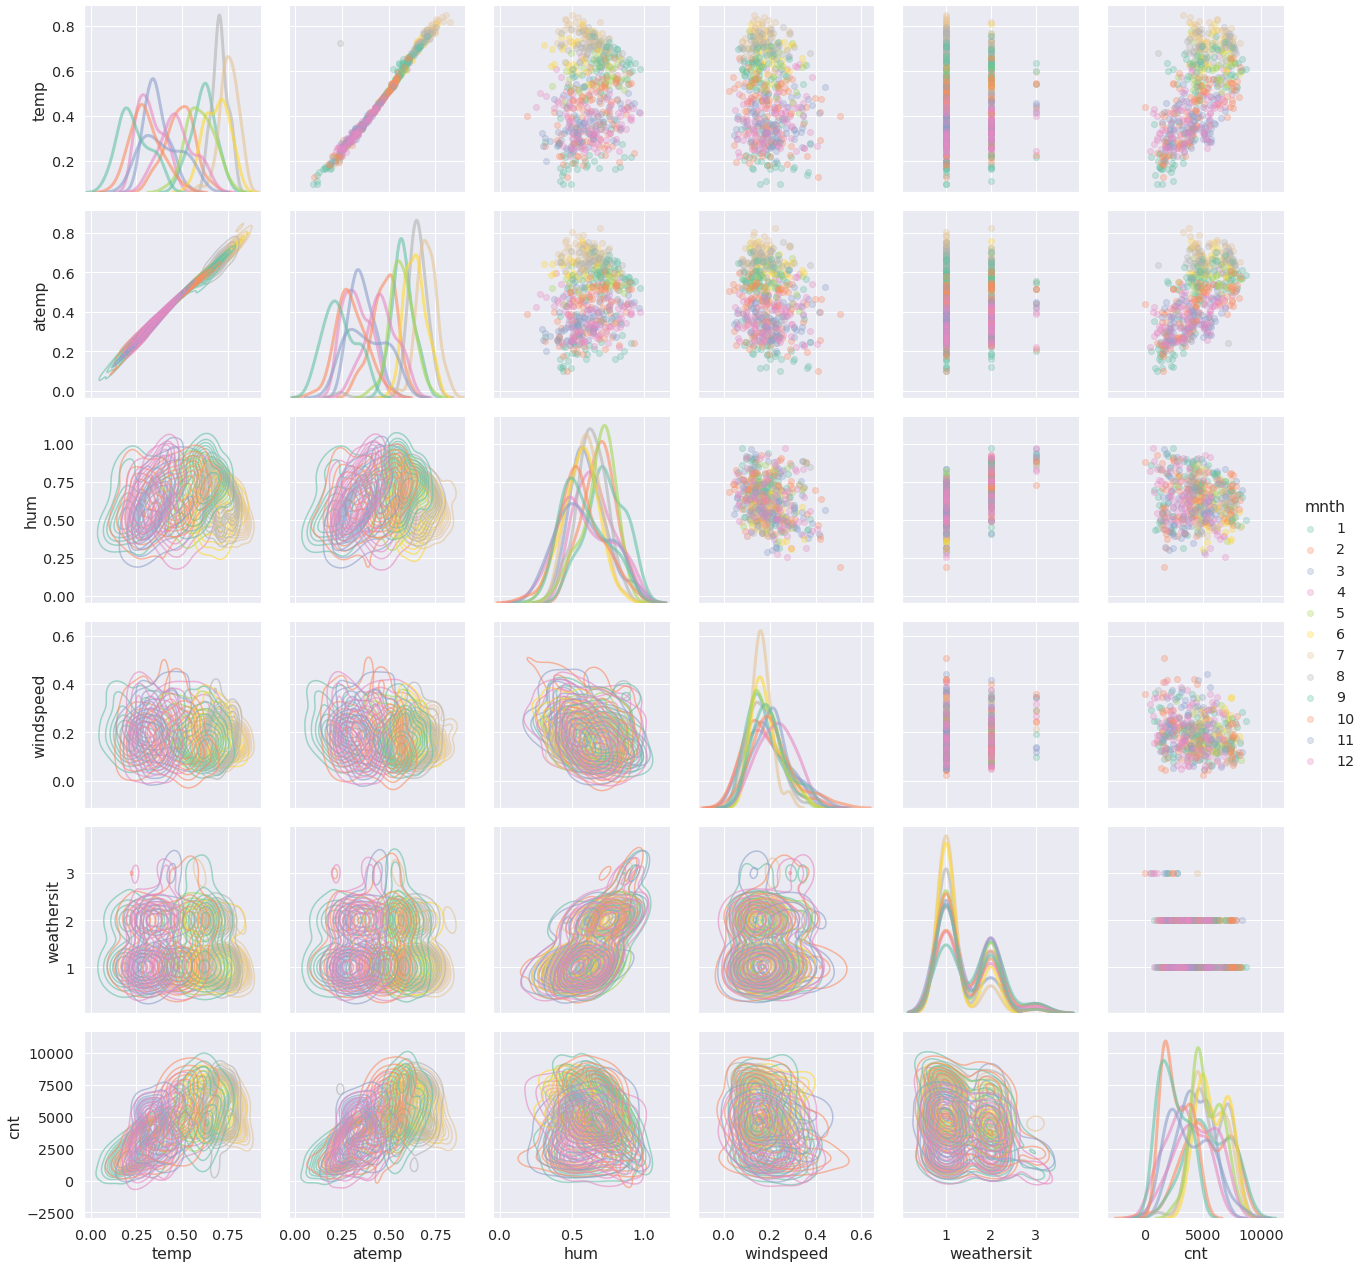

In [7]:
sns.set_style("darkgrid")
for hue in categorial_features:
    g = sns.PairGrid(train[real_features + [target_feature, ] + [hue, ]], hue=hue, palette='Set2',
                     diag_sharey=False,
                     height=3)
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.

**Выводы по графикам:**
Выбросы в графиках присутствуют, но они немногочисленны.
$x^2, log(x)$ в данных случаях не умеет смысла рассматривать, так как мы не наблюдаем параболических зависимостей, а так же экспоненциальных. А вот функция индикатора может пригодиться, так как могли бы немного иначе перестроить графики по `weathersit`.
Далее рассмотрим сами графики. Заметим, что в хорошую погоду велосипеды в аренду берут чаще ("хорошесть" погоды характеризует скорость ветра, температура, `weathersit`), явных выбросов по месяцам нет, как и явных кластеров по числу аренды. В среднем, арендуют от двух до восьми тысяч велосипедов в различные месяцы. Ощущаемая температура линейно зависима от температуры. По `weathersit`-1 больше всего данных аренды, а значит, эта категория самая популярная в рамках нашей выборки. Меньше всего велосипедов арендуют весной.

Итого, по данным графикам один из главных выводов это то, что мы не наблюдаем сильных колебаний на спрос велосипедов в течение года. Отслеживаются тенденции, но нельзя, например, утверждать, что число арендованных велосипедов в выходные в разы превышает число велосипедов в рабочие дни, как можно было бы предположить.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**
1. Необходимо изменить кодировку категориальных признаков с помощью `OneHotEncoder`.
2. Уберём выбросы на вещественных признаках.

In [12]:
def detect_by_hue(target_df, hue):
    # IQR
    Q1 = np.percentile(target_df[hue], 25, interpolation='midpoint')
    Q3 = np.percentile(target_df[hue], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(target_df[hue] >= (Q3 + 1.5 * IQR))
    # Lower bound
    lower = np.where(target_df[hue] <= (Q1 - 1.5 * IQR))
    ''' Removing the Outliers '''
    if len(upper) > 0:
        target_df.drop(upper[0], inplace=True, axis=0)
    if len(lower) > 0:
        target_df.drop(lower[0], inplace=True, axis=0)


for hue in real_features:
    detect_by_hue(train, hue)

In [13]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов.

In [14]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [15]:
model.coef_

array([-1.01768078e+03,  8.81576556e+03, -3.85659770e+03, -3.28816449e+03,
       -2.77968964e+02,  1.21214651e+03,  8.67298050e+02,  1.60768335e+03,
        2.93168118e+02, -7.11688962e+01, -1.34466600e+02, -2.32503890e+01,
       -5.06636306e+00,  6.64319514e+01,  3.70330352e+02, -4.60688415e+02,
       -7.26282834e+01,  6.08516663e+01, -4.25276250e+02, -1.10578564e+02,
       -7.79341976e+02, -1.02871514e+03, -6.45399496e+02,  5.11454308e+02,
       -1.25812547e+02, -4.46996337e+02, -3.19401141e+02])

In [16]:
model.intercept_

3401.1242173476685

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [17]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])
# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])
test_preds = model.predict(X_test)

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Проблема заключается в том, что линейно-зависимые призаки могут давать влияние на вычисление детерминанта обратной матрицы: он может быть близок к нулю, так как у нас есть несколько линейно зависимых столбцов в матрице.

In [18]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1447.0404884213426

In [19]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1217.1701685160097

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()


mean_absolute_percentage_error(test[target_feature], test_preds)

32.25034836482706

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [21]:
categorial_features = ['season', 'workingday', 'weekday', 'holiday', 'mnth', ]  # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

In [22]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])

In [23]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем
model.coef_

array([ 8133.09150753, -4661.56241513, -3667.67309413,  1191.93638502,
         835.85872892,  1597.09056381,   274.43514217,   -65.53173995,
        -134.63502767,   -29.97852526,   -24.09746449,    44.92876995,
         341.81858028,  -483.74912959,   -85.15185453,    19.04755372,
        -491.45582536,  -155.9441247 ,  -904.39945107, -1151.55550038,
        -737.37184884,   459.05924478,  -195.41288037,  -436.60533228,
        -325.62117983])

In [24]:
model.intercept_

3505.9942156476745

In [31]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])
# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])
test_preds = model.predict(X_test)

In [32]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1452.5486913181935

In [33]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1221.2224391072646

In [34]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()


mean_absolute_percentage_error(test[target_feature], test_preds)

32.30966085335608

**Выводы:**
Таким образом, мы выяснили, что линейно-зависимые признаки могут отрицательно влиять на результат, а именно, обнулять детерминант при вычислении обратной матрицы из формулы п.1 в задании 1, которой мы здесь пользуемся. Конкретно на наших данных исправления результата не внесли значимого изменения в численные значения коэффициентов, но мы предотвратили ошибку, которая бы могла произойти на других данных.
Веса, полученные в данном задании, не являются большими, а значит, наша модель успешно прошла обучение.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$L = |y-X\theta|^2 + \lambda |\theta|^2 = |y|^2 - 2y^T X^T \theta + \theta^T X^T X \theta + \lambda |\theta|^2$$
$$\nabla_{\theta} L = -2 X^T y + 2 X^T X \theta + 2 \lambda \theta = 0$$
Откуда мы имеем, пользуясь выпуклостью функции и необходимым условием локального минимума:
$$X^T y = (X^T X + \lambda I) \theta$$
$$\theta = (X^T X  + \lambda I)^{-1} x^T y$$

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как получается батч.

Для градиентного спуска:
$$- \eta \nabla_{\theta} L =  -\eta \cdot ( -2 X^T y + 2 X^T X \theta + 2 \lambda \theta )$$
Для стохастического градиентного спуска:
$$- \eta \nabla_{\theta} L =  -\eta \cdot ( -2 \cdot \text{batch}_k^T \cdot y(\text{batch}_k) +
2 \cdot \text{batch}_k^T \cdot \text{batch}_k \cdot \theta + 2 \lambda \theta )$$
Батч это набор из $k$ строк, выбор которого подчиняется равномерному распределению.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

В случае, когда коэффициенты не нормированы, нам сложно считать, какая модель лучше, а какая нет. А именно, поскольку мы считаем ошибку как $\lambda \cdot |\theta|^2$, то модель с весами $0.03, 300$ окажется хуже, чем с весами $3, 298$. Веса коэффициентов в их вкладе в ошибку чаще всего мы хотим сделать равными, тогда как отсутствие стандартизации этому мешает.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

Для начала реализуйте класс для работы с моделью ridge-регрессии. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [76]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit(self, X, Y):
        m, n = X.shape
        X_copy = X
        if (self.fit_intercept == True):
            X_copy = np.c_[X, np.ones((m, 1))]
            m, n = X_copy.shape
        self.theta = np.linalg.inv(X_copy.T @ X_copy + self.lambd * np.identity(n)) @ X_copy.T @ Y
        return self

    def predict(self, X):
        X_copy = X
        m, n = X.shape
        if (self.fit_intercept == True):
            X_copy = np.c_[X, np.ones((m, 1))]
        predictions = X_copy @ self.theta
        return predictions
    
    def get_theta(self):
        return self.theta

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

In [57]:
ridge_data = pd.read_csv('day.csv')
a = 137
tr, test = train_test_split(ridge_data, test_size=0.2, random_state=a, train_size=0.8)
train, validate = train_test_split(tr, test_size=0.25, random_state=a, train_size=0.75)

In [58]:
categorial_features = ['season', 'workingday', 'weekday', 'holiday', 'mnth', ]  # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

Выполните необходимые преобразования признаков. Не забудьте, что обучить преобразования нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее.

In [59]:
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель

train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train_cat, train[real_features]])

scaler = StandardScaler()
sc_train = scaler.fit_transform(X_train)

In [60]:
validate_cat = encoder.transform(validate[categorial_features])
X_validate = np.hstack([validate_cat, validate[real_features]])
sc_validate = scaler.transform(X_validate)

In [61]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test_cat, test[real_features]])
sc_test = scaler.transform(X_test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе.

In [62]:
lambdas = np.logspace(-2, 2.5, num=100, base=10.0)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. 

In [69]:
mae_list = []
mse_list = []
mape_list = []

mae_list_tr = []
mse_list_tr = []
mape_list_tr = []

for l in lambdas:
    model = RidgeRegression(lambd=l)  # объявляем модель
    model.fit(sc_train, train[target_feature])  # обучаем
    validate_preds = model.predict(sc_validate)
    train_preds = model.predict(sc_train)
    # вычисляю значения ошибок
    mse= metrics.mean_squared_error(validate[target_feature], validate_preds) ** 0.5
    mae = metrics.mean_absolute_error(validate[target_feature], validate_preds)
    mape = mean_absolute_percentage_error(validate[target_feature], validate_preds)

    mse_tr = metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5
    mae_tr = metrics.mean_absolute_error(train[target_feature], train_preds)
    mape_tr = mean_absolute_percentage_error(train[target_feature], train_preds)
    # сохраняю значения
    mae_list.append(mae)
    mse_list.append(mse)
    mape_list.append(mape)
    
    mae_list_tr.append(mae_tr)
    mse_list_tr.append(mse_tr)
    mape_list_tr.append(mape_tr)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Text(0, 0.5, 'значение ошибки')

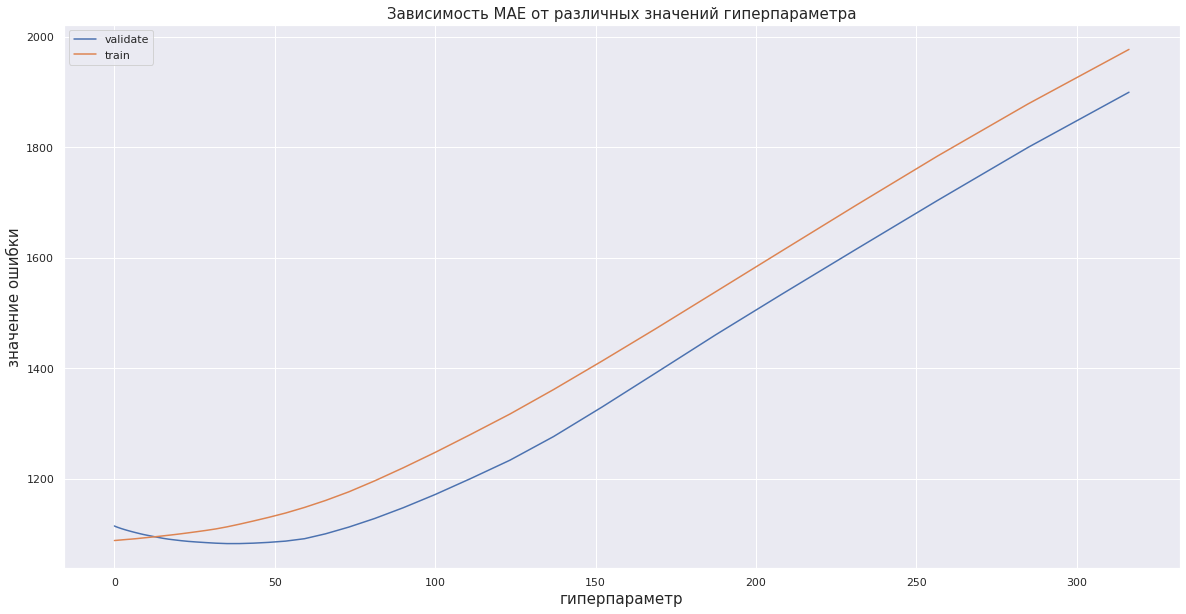

In [70]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.title('Зависимость MAE от различных значений гиперпараметра', fontsize=15)
sns.lineplot(x=lambdas, y=mae_list, label = 'validate')
sns.lineplot(x=lambdas, y=mae_list_tr, label = 'train')
plt.xlabel('гиперпараметр', fontsize=15)
plt.ylabel('значение ошибки', fontsize=15)

Text(0, 0.5, 'значение ошибки')

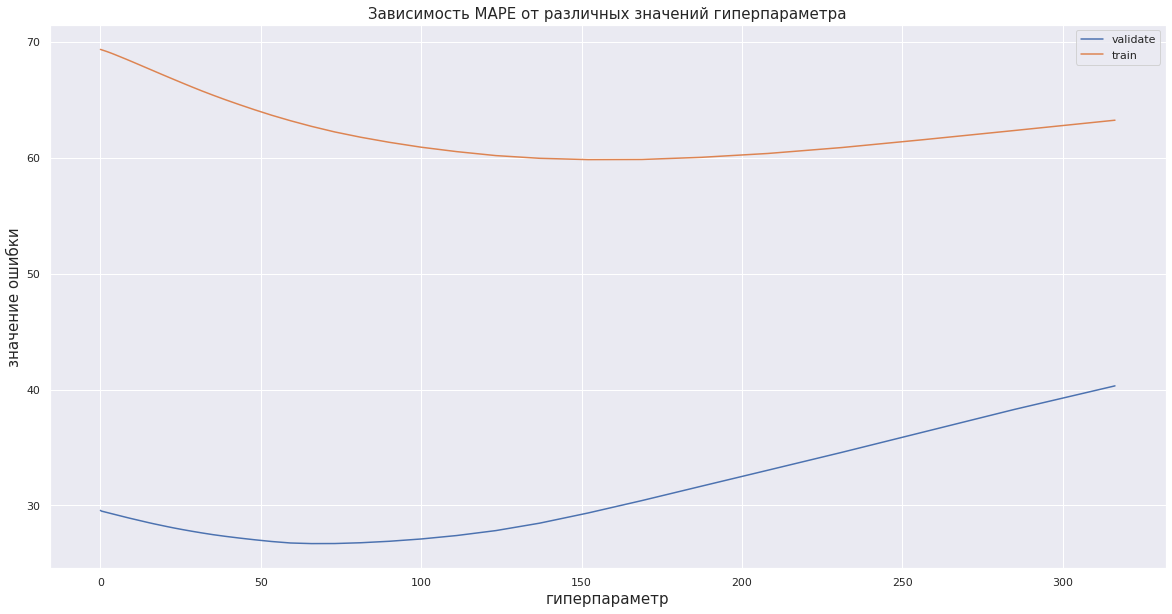

In [71]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.title('Зависимость MAPE от различных значений гиперпараметра', fontsize=15)
sns.lineplot(x=lambdas, y=mape_list, label='validate')
sns.lineplot(x=lambdas, y=mape_list_tr, label='train')
plt.xlabel('гиперпараметр', fontsize=15)
plt.ylabel('значение ошибки', fontsize=15)

Text(0, 0.5, 'значение ошибки')

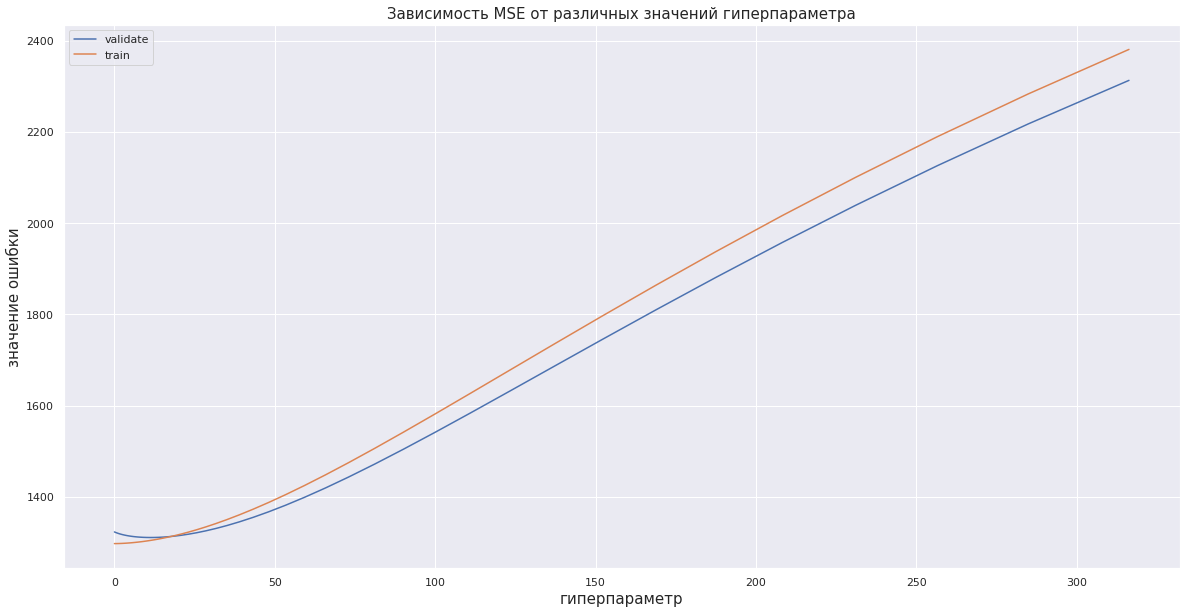

In [72]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.title('Зависимость MSE от различных значений гиперпараметра', fontsize=15)
sns.lineplot(x=lambdas, y=mse_list, label='validate')
sns.lineplot(x=lambdas, y=mse_list_tr, label='train')
plt.xlabel('гиперпараметр', fontsize=15)
plt.ylabel('значение ошибки', fontsize=15)

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Для наглядности можно попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [200]:
thetas = []
for l in lambdas:
    model = RidgeRegression(lambd=l)  # объявляем модель
    model.fit(sc_train, train[target_feature])  # обучаем
    theta = model.get_theta()
    thetas.append(theta)
thetas = np.asarray(thetas).T

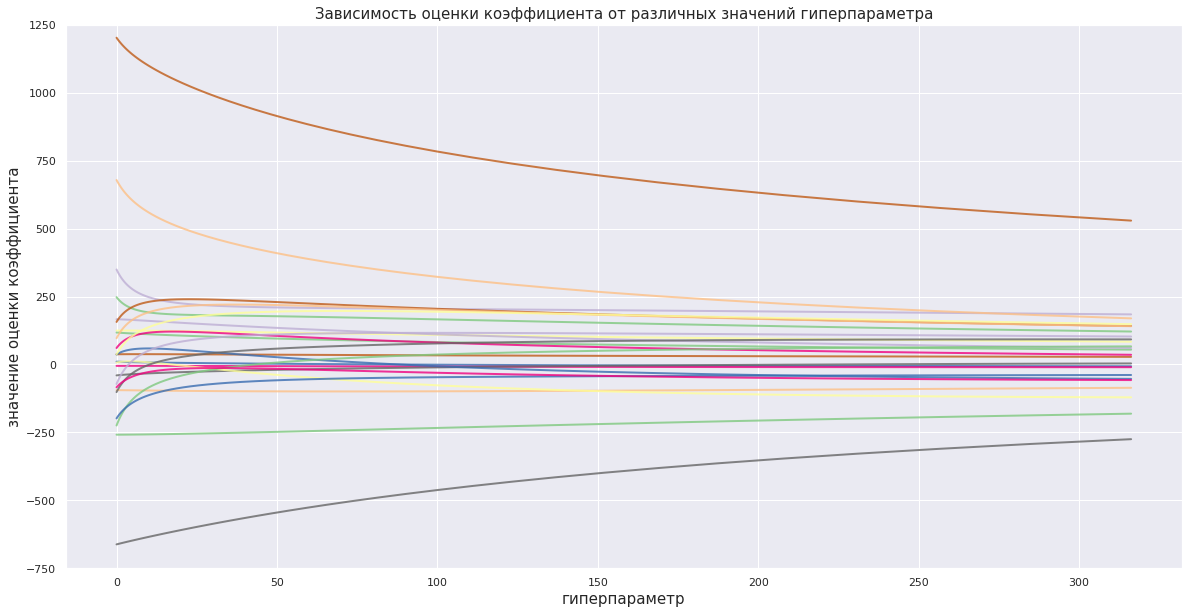

In [217]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.title('Зависимость оценки коэффициента от различных значений гиперпараметра', fontsize=15)
new_palette = sns.color_palette('Accent', len(thetas))
for i in range(0, len(thetas)):
    plt.plot(lambdas, thetas[i], color=new_palette[i], lw = 2, label = i, alpha=0.8)
plt.xlabel('гиперпараметр', fontsize=15)
plt.ylabel('значение оценки коэффициента', fontsize=15)
plt.ylim(-750, 1250)
plt.show()

Таким образом, с увеличением гиперпараметра мы наблюдаем сходимость коэффициентов к некоторому числу, близкому к нулю.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

В качестве оптимального значения гиперпараметра я выберу минимум по MAE:

In [224]:
optimal = lambdas[mae_list.index(min(mae_list))]
optimal

35.11191734215131

In [226]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test_cat, test[real_features]])
sc_test = scaler.transform(X_test)

In [227]:
model = RidgeRegression(lambd=optimal)  # объявляем модель
model.fit(sc_train, train[target_feature])  # обучаем
test_preds = model.predict(sc_test)
# вычисляю значения ошибок
mse = metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5
mae = metrics.mean_absolute_error(test[target_feature], test_preds)
mape = mean_absolute_percentage_error(test[target_feature], test_preds)

In [228]:
mse

1330.1718890960435

In [229]:
mae

1073.6024133267101

In [230]:
mape

27.648449139388852

Сделайте выводы.

**Вывод:**  
Таким образом, при оптимальном значении гиперпараметра ошибки на тестирующей выборке невелеки относительно тех значений, что мы получали на обучающей и валидирующих выборках. Например, MAPE принимает достаточно низкое значение, если соотносить его с полученным выше графиком. Таким образом, модель обучена успешно.

С увеличением гиперпараметра значения коэффициента значения гиперпараметра экспоненциально затухают. Ниже приведён график для наглядности. Как можно видеть, мы наблюдаем экспоненциальное затухание, но затухание более медленное, нежели классическая экспонента, умноженная на константу.

(0.0, 4.0)

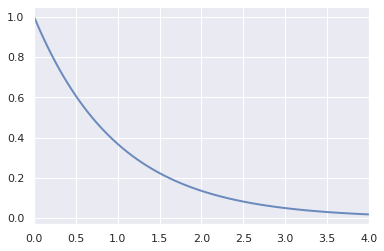

In [241]:
x = np.linspace(0, 4, 100)
plt.plot(x, np.exp(-x), lw = 2, label = i, alpha=0.8)
plt.xlim (0, 4)

### Задача 5. (НЕ ВЫПОЛНЯЛА)

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру mini-batch стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча обычно берут кратно степени двойки, например, 128 или 256.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.